Эркенова Джамиля, 15.11Д-ПМ03/19б

# Распознавание рукописных цифр MNIST («Modified National Institute of Standards and Technology»)

Импортируем необходимые модули

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.python.keras.models import Model, model_from_json

Библиотека образцов поставляется вместе с Keras и для доступа к ней нужно выполнить следующий импорт:

In [2]:
from tensorflow.keras.datasets import mnist

Здесь 60 000 изображений в обучающей выборке и 10 000 – в тестовой. 

Мы будем использовать определения:

x_train – изображения цифр обучающей выборки;

y_train – вектор соответствующих значений цифр (например, если на i-м изображении нарисована 5, то  y_train[i] = 5);

x_test – изображения цифр тестовой выборки;

y_test – вектор соответствующих значений цифр для тестовой выборки.

Загрузим образцы в обучающую и тестовую выборки

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Каждое изображение имеет размер 28х28 пикселей и представлено в градациях серого, т.е. каждый пиксел имеет значение от 0 до 255 (0 – черный цвет, 255 – белый). 

Выведем первые 25 изображений из этой базы:

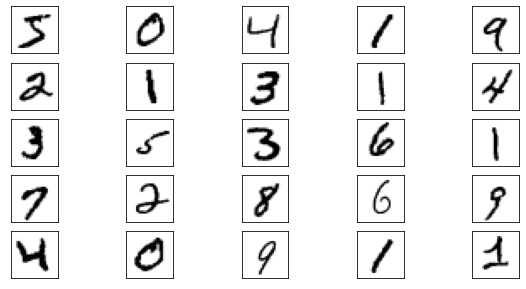

In [4]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show()

Построим модель полносвязной НС 

28 x 28 = 784 входами;

128 нейронами скрытого слоя;

10 нейронами выходного слоя.


В качестве функций активации скрытого слоя выберем популярную на сегодняшний день ReLu, а у выходных нейронов – softmax, т.к. мы хотим интерпретировать выходные значения в терминах вероятности принадлежности к тому или иному классу цифр.

In [5]:
model = keras.Sequential([
                          Flatten(input_shape = (28,28, 1)),
                          Dense(128, activation = 'relu'),
                          Dense(10, activation = 'softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Cтандартизируем входные значения изображения так, чтобы они находились в диапазоне от 0 до 1.

Каждое значение тензоров x_train и x_test будет делиться на максимальное число 255, которое они могут принимать. На выходе получим вещественные величины от 0 до 1.

In [6]:
x_train = x_train / 255
x_test = x_test / 255

Подготовим правильный формат выходных значений. Для каждого изображения цифры вектор y_train содержит число, а нам нужен вектор с 1 на месте соответствующего числа, т.к. наша НС имеет 10 выходов, и каждый выход будет соответствовать определенной цифре: от 0 до 9.

In [7]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

Выберем функцию потерь (loss function) и способ оптимизации градиентного алгоритма. В задачах классификации лучше всего начинать с категориальной кросс-энтропии и активационной функции выходных нейронов softmax. 



In [8]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Запустим обучение модели.


In [9]:
hist = model.fit(x_train, y_train_cat, batch_size = 32, epochs = 15, validation_split = 0.2)

Epoch 1/15
1500/1500 [==============================] - 11s 6ms/step - loss: 0.2937 - accuracy: 0.9148 - val_loss: 0.1599 - val_accuracy: 0.9528
Epoch 2/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1280 - accuracy: 0.9617 - val_loss: 0.1156 - val_accuracy: 0.9659
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0883 - accuracy: 0.9730 - val_loss: 0.0967 - val_accuracy: 0.9708
Epoch 4/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0655 - accuracy: 0.9806 - val_loss: 0.0911 - val_accuracy: 0.9719
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0502 - accuracy: 0.9847 - val_loss: 0.0912 - val_accuracy: 0.9717
Epoch 6/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0389 - accuracy: 0.9883 - val_loss: 0.1018 - val_accuracy: 0.9721
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0812 - val_accuracy

Здесь появились новые параметры:

batch_size = 32 – это размер батча (32 картинки), после которых будет выполняться корректировка весов;

validation_split = 0,2 – разбиение обучающей выборки на собственно обучающую и проверочную. Значение 0,2 определяет, что для каждой эпохи 20% случайных картинок из обучающей выборки будут помещаться в выборку валидации. 20% - это довольно частое значение для создания проверочной выборки (ее, как правило, выбирают из диапазона от 10% до 30%).

Выполним проверку работы сети на тестовом множестве

In [10]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0873 - accuracy: 0.9802


[0.08732487261295319, 0.9801999926567078]

Метод evaluate прогоняет все тестовое множество и вычисляет значение критерия качества и метрики.

Выполним распознавания какого-либо тестового изображения. 

Сначала выделяем из тензора n-е изображение и прогоняем его по сети, используя метод predict. На выходе получим 10 значений, по которым нужно будет определить правильность классификации цифр.

Полагаем, что максимальное значение как раз и будет соответствовать нужному классу

In [11]:
n=120
x = np.expand_dims(x_test[n], axis = 0)
res = model.predict(x)
print(res)

[[1.0928229e-22 9.1925758e-20 1.7289873e-20 3.3001024e-07 2.9547818e-27
  9.9999964e-01 1.1874303e-21 1.1311769e-18 3.6807796e-12 1.6322247e-08]]


Чтобы было проще воспринимать выходную информацию, будем выводить номер максимального числа из этого вектора. Для этого воспользуемся довольно удобной функцией argmax модуля numpy

In [12]:
print(np.argmax(res))

5


Отобразим на экране это тестовое изображение

<function matplotlib.pyplot.show>

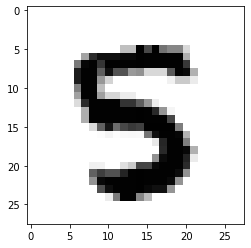

In [13]:
plt.imshow(x_test[n], cmap = plt.cm.binary)
plt.show



Посмотрим на неверные результаты распознавания. Пропустим через НС всю тестовую выборку и векторы выходных значений преобразуем в числа от 0 до 9:

In [14]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis = 1)
print(pred[:25])
print(y_test[:25])

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4]


Сформируем маску, которая будет содержать True для верных вариантов и False – для неверных. И с помощью этой маски выделим из тестовой выборки все неверные результаты

In [15]:
mask = pred == y_test
print(mask[:20])

x_false = x_test[~mask]
y_false = x_test[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True False  True]
(198, 28, 28)


Выведем первые 5 неверно классифицированных изображений на экран

Результат распознавания 7


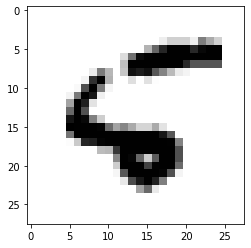

Результат распознавания 2


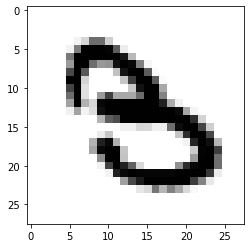

Результат распознавания 1


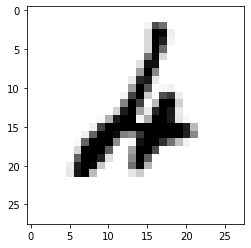

Результат распознавания 0


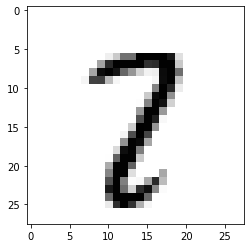

Результат распознавания 4


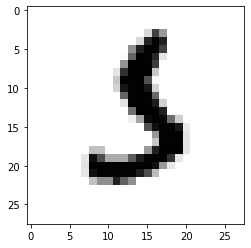

In [40]:
for i in range(5):
  print("Результат распознавания "+str(y_test[i]))
  plt.imshow(x_false[i], cmap = plt.cm.binary)
  plt.show()

Выведем отчет о классификации и построим матрицу ошибок

In [17]:
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

[[ 971    0    0    1    0    1    3    1    2    1]
 [   0 1126    3    0    0    1    2    0    3    0]
 [   3    1 1010    3    1    0    4    6    4    0]
 [   1    0    2  979    0    7    0    4    6   11]
 [   1    0    1    1  966    0    4    2    0    7]
 [   1    1    0    5    1  867    3    1    7    6]
 [   4    3    0    1    2    3  943    0    2    0]
 [   1    3   12    1    1    0    0 1007    1    2]
 [   3    1    2    4    1    3    1    4  952    3]
 [   3    2    0    3    9    2    0    8    1  981]]


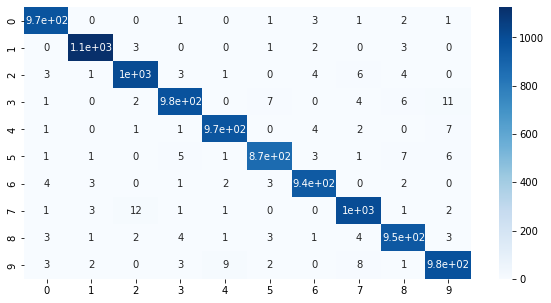

In [18]:
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
plt.figure(figsize = (10, 5))
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')

In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Построим графики Accuracy и Loss для обучающей и валидационной выборок

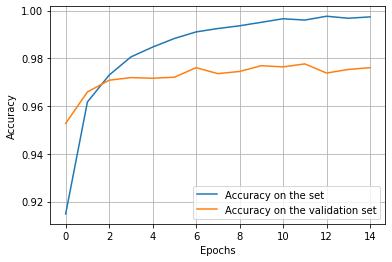

In [20]:
plt.plot(hist.history['accuracy'], label = 'Accuracy on the set')
plt.plot(hist.history['val_accuracy'], label = 'Accuracy on the validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

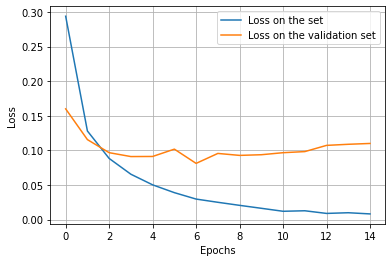

In [21]:
plt.plot(hist.history['loss'], label = 'Loss on the set')
plt.plot(hist.history['val_loss'], label = 'Loss on the validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

 # Dropout - метод борьбы с переобучением нейронной сети

Если наблюдается расхождение в точности выходных значений между обучающей и проверочной выборками, то процесс обучения следует остановить и уменьшить число нейронов.

Но это не всегда дает желаемые результаты. Не редко с уменьшением числа нейронов уменьшается и точность выходных значений, то есть, показатель качества работы нейросети ухудшается. Очевидно, в таких случаях с переобучением нужно бороться с сохранением числа нейронов. Здесь нам на помощь приходит алгоритм под названием Dropout

На русский язык его переводят как «метод прореживания» или «метод исключения» или же просто, говорят «дропаут».

Цель этого метода – снизить специализацию каждого отдельного нейрона и сделать из них «специалистов более широкого профиля».  Именно в этом корень проблемы переобучения. Но как уменьшить специализацию, сохраняя прежнее число нейронов? Очень просто.

на каждой итерации изменения весовых коэффициентов часть нейронов нужно исключать с заданной вероятностью p:

если веса меняются после каждого mini-batch, значит, переключение происходит после него. Если же веса меняются при каждом новом наблюдении, значит и переключение происходит с той же частотой. И так далее, то есть, мы переключаемся после каждой корректировки весовых коэффициентов.

После того, как сеть обучена, включаются все нейроны и эффект переобучения (излишней специализации) должен заметно снизиться.



Во многих фреймворках алгоритм Dropout реализован именно так: суммарный сигнал на входах нейронов масштабируется, эмулируя поведение полной сети со всеми нейронами. Благодаря этому, в среднем, выходной сигнал сети соответствует истинным значениям и при ее эксплуатации (со всеми включенными нейронами) не будет возникать «сюрпризов».

как выбирать значение вероятности p? Авторы этого подхода рекомендуют для нейронов скрытого слоя начинать со значения p=0,5.  Затем при необходимости можно пробовать значения 0,4 и 0,3.

Также следует иметь в виду, что это не абсолютное средство: оно может как помочь, так и не помочь. Если эффекта нет, то от него лучше отказаться и искать другие пути выхода из сложившейся ситуации. И добавлять его в НС только в случае возникновения проблем с переобучением. Моя рекомендация: просто так сразу, изначально его применять не нужно, только при описанных проблемах.

Добавим в модель полносвязной НС слой Dropuot

28 x 28 = 784 входами;

256 нейронами скрытого слоя;

10 нейронами выходного слоя.

In [41]:
model_1 = keras.Sequential([
                          Flatten(input_shape = (28,28, 1)),
                          Dense(128, activation = 'relu'),
                          Dropout(0.6),
                          Dense(64, activation = 'relu'),
                          Dropout(0.6),
                          Dense(10, activation = 'softmax')
])
print(model_1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               100480    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-tr

In [23]:
model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
hist_1 = model_1.fit(x_train, y_train_cat, batch_size = 32, epochs = 15, validation_split = 0.2)

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.8022 - accuracy: 0.7504 - val_loss: 0.2526 - val_accuracy: 0.9298
Epoch 2/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4536 - accuracy: 0.8750 - val_loss: 0.1881 - val_accuracy: 0.9499
Epoch 3/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3850 - accuracy: 0.8961 - val_loss: 0.1660 - val_accuracy: 0.9550
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3543 - accuracy: 0.9030 - val_loss: 0.1575 - val_accuracy: 0.9582
Epoch 5/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3325 - accuracy: 0.9083 - val_loss: 0.1599 - val_accuracy: 0.9553
Epoch 6/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3089 - accuracy: 0.9160 - val_loss: 0.1461 - val_accuracy: 0.9592
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3041 - accuracy: 0.9160 - val_loss: 0.1364 - val_accuracy:

In [25]:
model_1.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1303 - accuracy: 0.9649


[0.1302536129951477, 0.964900016784668]

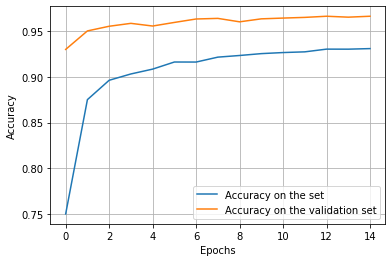

In [26]:
plt.plot(hist_1.history['accuracy'], label = 'Accuracy on the set')
plt.plot(hist_1.history['val_accuracy'], label = 'Accuracy on the validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

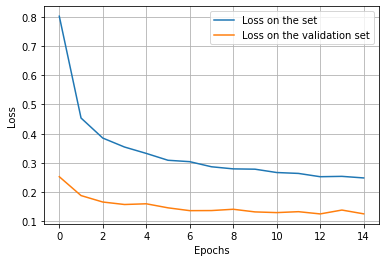

In [27]:
plt.plot(hist_1.history['loss'], label = 'Loss on the set')
plt.plot(hist_1.history['val_loss'], label = 'Loss on the validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Проверим то же самое, но с оптимайзером SGD и activation selu вместо relu

In [42]:
model_1 = keras.Sequential([
                          Flatten(input_shape = (28,28, 1)),
                          Dense(128, activation = 'selu'),
                          Dropout(0.6),
                          Dense(64, activation = 'selu'),
                          Dropout(0.6),
                          Dense(10, activation = 'softmax')
])
print(model_1.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-tr

In [43]:
model_1.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [44]:
hist_1 = model_1.fit(x_train, y_train_cat, batch_size = 32, epochs = 15, validation_split = 0.2)

Epoch 1/15
1500/1500 [==============================] - 6s 3ms/step - loss: 0.9773 - accuracy: 0.6879 - val_loss: 0.3597 - val_accuracy: 0.8985
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6441 - accuracy: 0.8017 - val_loss: 0.3334 - val_accuracy: 0.9059
Epoch 3/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5765 - accuracy: 0.8254 - val_loss: 0.3112 - val_accuracy: 0.9093
Epoch 4/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5461 - accuracy: 0.8382 - val_loss: 0.3062 - val_accuracy: 0.9106
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5193 - accuracy: 0.8472 - val_loss: 0.2926 - val_accuracy: 0.9162
Epoch 6/15
1500/1500 [==============================] - 5s 4ms/step - loss: 0.5071 - accuracy: 0.8511 - val_loss: 0.2913 - val_accuracy: 0.9156
Epoch 7/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4914 - accuracy: 0.8544 - val_loss: 0.2854 - val_accuracy:

In [45]:
model_1.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.2695 - accuracy: 0.9207


[0.2694832682609558, 0.9207000136375427]

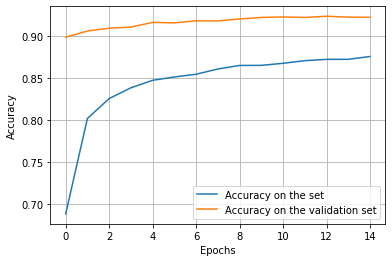

In [46]:
plt.plot(hist_1.history['accuracy'], label = 'Accuracy on the set')
plt.plot(hist_1.history['val_accuracy'], label = 'Accuracy on the validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

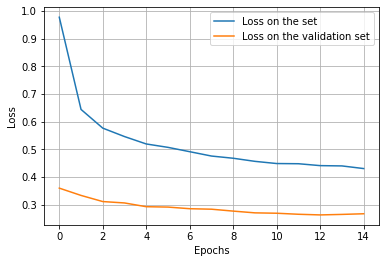

In [47]:
plt.plot(hist_1.history['loss'], label = 'Loss on the set')
plt.plot(hist_1.history['val_loss'], label = 'Loss on the validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Результаты хуже

# Сохранение архитектуры сети и весовых коэффициентов после обучения

In [28]:
print("Сохраняем сеть")
model_json = model_1.to_json()
json_file = open('MNIST.json', 'w')
json_file.write(model_json)
json_file.close()
model_1.save_weights('MNIST.h5')

Сохраняем сеть


In [29]:
# Загружаем данные об архитектуре сети из файла json
json_file = open('MNIST.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
# Создаем модель на основе загруженных данных
loaded_model = model_from_json(loaded_model_json)
# Загружаем веса в модель
loaded_model.load_weights('MNIST.h5')

In [30]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
________________________________________________

# Пример использования EarlyStopping Callback для остановки обучения нейросети при переобучении

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
model_2 = keras.Sequential([
                          Flatten(input_shape = (28,28, 1)),
                          Dense(512, activation = 'relu'),
                          Dense(10, activation = 'softmax')
])
print(model_2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Создаем EarlyStopping Callback

In [34]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=3, verbose=1)

In [35]:
hist_2 = model_2.fit(x_train, y_train_cat, batch_size = 32, epochs = 15, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2197 - accuracy: 0.9358 - val_loss: 0.1244 - val_accuracy: 0.9647
Epoch 2/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0897 - accuracy: 0.9717 - val_loss: 0.1003 - val_accuracy: 0.9712
Epoch 3/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.0814 - val_accuracy: 0.9768
Epoch 4/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0387 - accuracy: 0.9874 - val_loss: 0.0828 - val_accuracy: 0.9757
Epoch 5/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0821 - val_accuracy: 0.9763
Epoch 6/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0223 - accuracy: 0.9925 - val_loss: 0.0879 - val_accuracy: 0.9776
Epoch 6: early stopping


In [36]:
print('Обучение остановлено на эпохе', early_stopping_callback.stopped_epoch)

Обучение остановлено на эпохе 5


In [37]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 2s 4ms/step - loss: 0.0705 - accuracy: 0.9801


[0.07052117586135864, 0.9800999760627747]

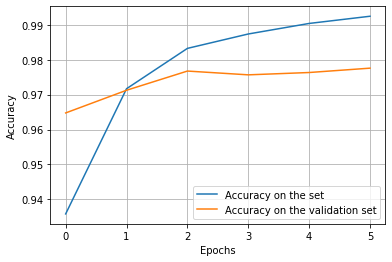

In [38]:
plt.plot(hist_2.history['accuracy'], label = 'Accuracy on the set')
plt.plot(hist_2.history['val_accuracy'], label = 'Accuracy on the validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

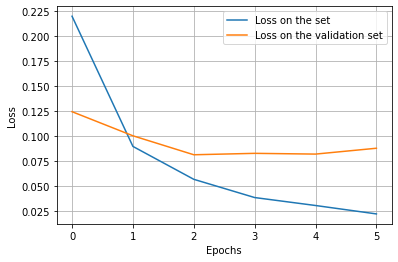

In [39]:
plt.plot(hist_2.history['loss'], label = 'Loss on the set')
plt.plot(hist_2.history['val_loss'], label = 'Loss on the validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Изменим некоторые параметры модели

In [48]:
model_2 = keras.Sequential([
                          Flatten(input_shape = (28,28, 1)),
                          Dense(512, activation = 'selu'),
                          Dense(10, activation = 'softmax')
])
print(model_2.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               401920    
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
model_2.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [50]:
early_stopping_callback = EarlyStopping(monitor = 'loss', patience=3, verbose=1)

In [51]:
hist_2 = model_2.fit(x_train, y_train_cat, batch_size = 32, epochs = 15, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/15
1500/1500 [==============================] - 10s 6ms/step - loss: 0.5247 - accuracy: 0.8599 - val_loss: 0.3367 - val_accuracy: 0.9075
Epoch 2/15
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3380 - accuracy: 0.9050 - val_loss: 0.3022 - val_accuracy: 0.9150
Epoch 3/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3082 - accuracy: 0.9125 - val_loss: 0.2848 - val_accuracy: 0.9197
Epoch 4/15
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2915 - accuracy: 0.9177 - val_loss: 0.2747 - val_accuracy: 0.9230
Epoch 5/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2800 - accuracy: 0.9206 - val_loss: 0.2664 - val_accuracy: 0.9252
Epoch 6/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2708 - accuracy: 0.9223 - val_loss: 0.2601 - val_accuracy: 0.9282
Epoch 7/15
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2623 - accuracy: 0.9253 - val_loss: 0.2543 - val_accura

In [52]:
print('Обучение остановлено на эпохе', early_stopping_callback.stopped_epoch)

Обучение остановлено на эпохе 0


In [53]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.2148 - accuracy: 0.9387


[0.2147882580757141, 0.9387000203132629]

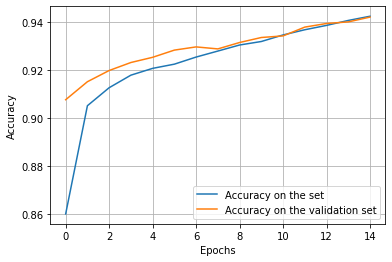

In [54]:
plt.plot(hist_2.history['accuracy'], label = 'Accuracy on the set')
plt.plot(hist_2.history['val_accuracy'], label = 'Accuracy on the validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

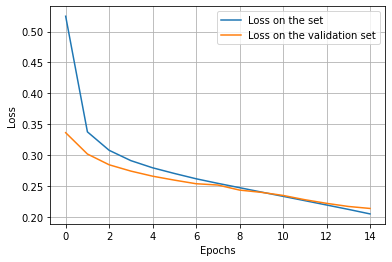

In [55]:
plt.plot(hist_2.history['loss'], label = 'Loss on the set')
plt.plot(hist_2.history['val_loss'], label = 'Loss on the validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Результаты точнее, но ранней остановки не произошло